In [250]:
from langgraph.graph import StateGraph,START,END

In [251]:
from dotenv import load_dotenv
from typing import TypedDict

In [252]:
load_dotenv()

True

In [253]:
import os
langraph_key = os.getenv("LANGGRAPH_API")

os.environ["GROQ_API_KEY"] = langraph_key

In [ ]:
from langchain_groq import ChatGroq
api_key=''
llm = ChatGroq(model='llama-3.1-8b-instant',api_key=api_key)
# llm = ChatGroq(model='llama-3.1-8b-instant',api_key=langraph_key)

In [255]:
class LLMState(TypedDict):
    #create a state for the input and the output
    question : str
    answer :str

In [256]:
def llm_qa(state : LLMState) -> LLMState:

    question = state['question']

    prompt = f'Answer the following question: {question}'

    answer = llm.invoke(prompt).content

    state['answer'] = answer

    return state
   



In [257]:
graph  = StateGraph(LLMState)
graph.add_node('llm_qa',llm_qa)

graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

In [258]:
workflow= graph.compile()

In [259]:
initial_state = {'question':'what is the distance between moon and earth?'}

In [260]:
final_state = workflow.invoke(initial_state)

In [261]:
final_state

{'question': 'what is the distance between moon and earth?',
 'answer': "The average distance between the Earth and the Moon is about 384,400 kilometers (238,900 miles). This distance can vary slightly due to the elliptical shape of the Moon's orbit around the Earth. At its closest point (called perigee), the distance is approximately 363,300 kilometers (225,300 miles). At its farthest point (apogee), the distance is about 405,500 kilometers (252,000 miles)."}

In [263]:
from IPython.display import Image

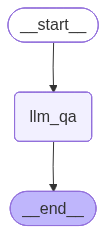

In [265]:
Image(workflow.get_graph().draw_mermaid_png())